In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

[array([-0.00637466, -0.22066159,  0.9753296 ])]
[array([-0.00637466, -0.22066159,  0.9753296 ]), array([-0.52533684,  0.83065188,  0.1844957 ])]
[array([-0.00637466, -0.22066159,  0.9753296 ]), array([-0.52533684,  0.83065188,  0.1844957 ]), array([ 0.85087048,  0.51120047,  0.12121678])]


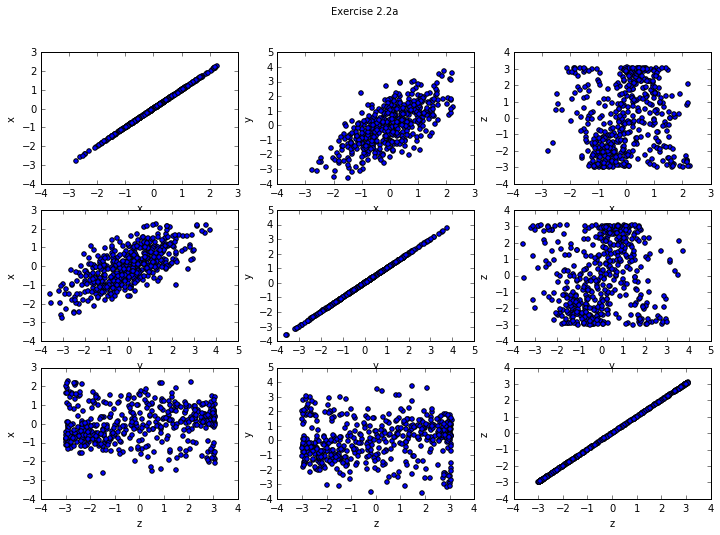

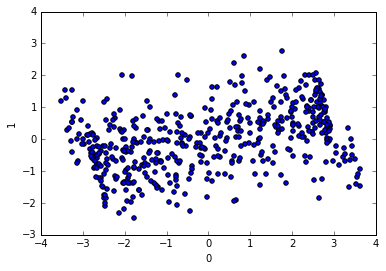

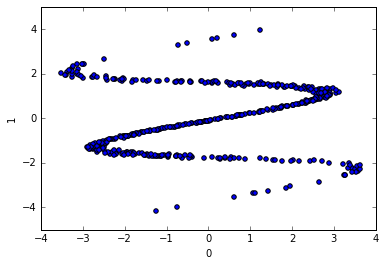

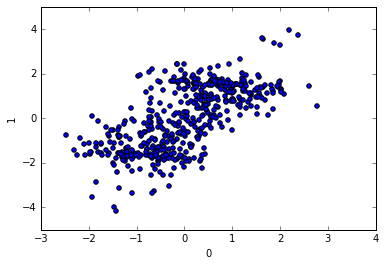

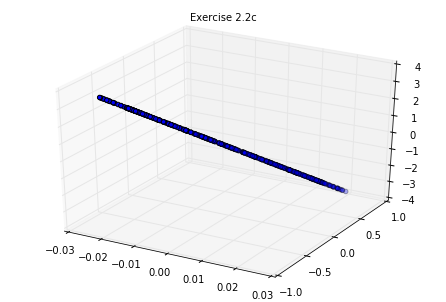

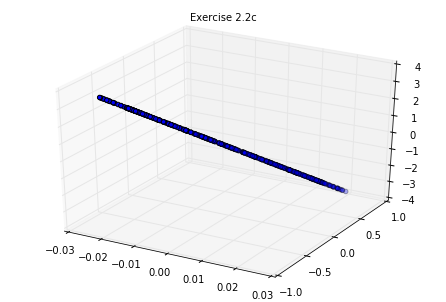

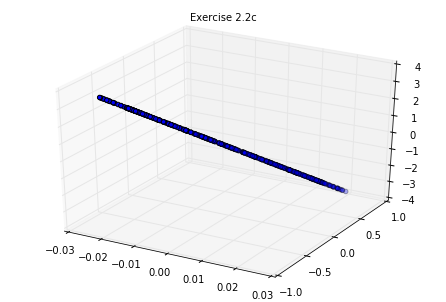

In [5]:
f = open('pca-data-3d.txt')
data = pd.read_table(f, sep=',',lineterminator='\n')

#center
data = data - data.mean()

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
fig.suptitle('Exercise 2.2a')

for x, y in itertools.product(range(3), repeat=2):
    data.plot(subplots=True, kind='scatter', x=x, y=y, ax=ax[x, y])
    
    
#calculate eigenvectors and eigenvalues
covmat = data.cov()
eigvals, eigvecs = np.linalg.eigh(covmat)
sorted_vecs = sorted(zip(eigvals, eigvecs), key=lambda x: x[0], reverse=True)
eigvecs = [x[1] for x in sorted_vecs]

#2.2B transform into the coordinate system of the PCAs

def transformPCA(data, basis):
    data = np.dot(basis, data.T).T
    return data

def plotPCA(dataframe, dim):
    for x, y in itertools.product(range(dim), repeat=2):
        dataframe.plot(subplots=True, kind='scatter', x=0, y=1, ax=ax[x, y])

for comb in itertools.combinations(range(3), 2):
    selected_pcas = np.array([eigvecs[pos] for pos in comb])
    transformed = transformPCA(data, selected_pcas)
    pd.DataFrame(transformed).plot(kind='scatter', x=0, y=1)
    
    
#2.2C 
for num_pcs in range(3):
    pcs = eigvecs[0:num_pcs + 1]
    transformed = transformPCA(data, pcs)
    print(pcs)
    pcs = np.array(pcs)
    reconstructed = np.dot(pcs.T, transformed.T).T

    fig = plt.figure()
    ax = Axes3D(fig)
    fig.suptitle('Exercise 2.2c')
    data = reconstructed
    ax.scatter(data[:, 0], data[:, 1], data[:, 2])